# Разведочный анализ данных. Исследование и визуализация данных.

## 1. Текстовое описание набора данных

В качестве набора данных для анализа был выбран датасет ["Moscow Housing Price Dataset"](https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset) с платформы Kaggle. Датасет содержит информацию о ценах на жилье в Москве.

Эта задача является актуальной для многих людей, так как цены на жилье в Москве являются одними из самых высоких в России. Поэтому анализ цен на жилье в Москве может быть полезен для людей, которые планируют купить или продать жилье в Москве.

В файле `moscow_housing.csv` содержится следующая информация:

- `Price` - цена квартиры в указанной валюте. Это основная целевая переменная для прогнозирования.
- `Apartment type` - тип квартиры, такой как студия, однокомнатная, двухкомнатная и т.д.
- `Metro station` - название ближайшей станции метро к местоположению квартиры.
- `Minutes to metro` - время в минутах, необходимое для прогулки от квартиры до ближайшей станции метро.
- `Region` - регион, в котором находится квартира (Москва или Московская область).
- `Number of rooms` - общее количество комнат в квартире, включая спальни, гостиные и т.д.
- `Area` - общая площадь квартиры в квадратных метрах.
- `Living area` - жилая площадь квартиры в квадратных метрах, т.е. площадь, пригодная для проживания.
- `Kitchen area` - площадь кухни в квадратных метрах.
- `Floor` - этаж, на котором находится квартира.
- `Number of floors` - общее количество этажей в здании, где находится квартира.
- `Renovation` - уровень ремонта квартиры, такой как "без ремонта", "косметический ремонт", "евроремонт" и т.д.

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_theme(style="whitegrid")

### Загрузка данных

Загрузим данные с помощью библиотеки `pandas`.

In [3]:
data = pd.read_csv('moscow_housing.csv', sep=",")

# 2. Основные характеристики датасета

Выведем первые 5 строк датасета, чтобы понять, какие данные содержатся в датасете.

In [4]:
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


Также выведем основные характеристики датасета, такие как количество строк, названия столбцов и типы данных в столбцах.

In [5]:
total = data.shape[0]
print(f'Всего записей: {total}')

Всего записей: 22676


In [6]:
data.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [7]:
data.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation           object
dtype: object

Проверим наличие пропущенных значений в датасете.

In [8]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print(f'{col} - {temp_null_count}')

Price - 0
Apartment type - 0
Metro station - 0
Minutes to metro - 0
Region - 0
Number of rooms - 0
Area - 0
Living area - 0
Kitchen area - 0
Floor - 0
Number of floors - 0
Renovation - 0


Наконец, выведем описательные статистики для числовых столбцов.

In [9]:
data.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


# 3. Визуализальное исследование датасета

Для визуализации данных используем библиотеки `matplotlib` и `seaborn`.
Построим наиболее популярные графики для визуализации данных, такие как гистограммы, ящики с усами, графики рассеяния и т.д.

### Диаграмма рассеяния

<Axes: xlabel='Area', ylabel='Price'>

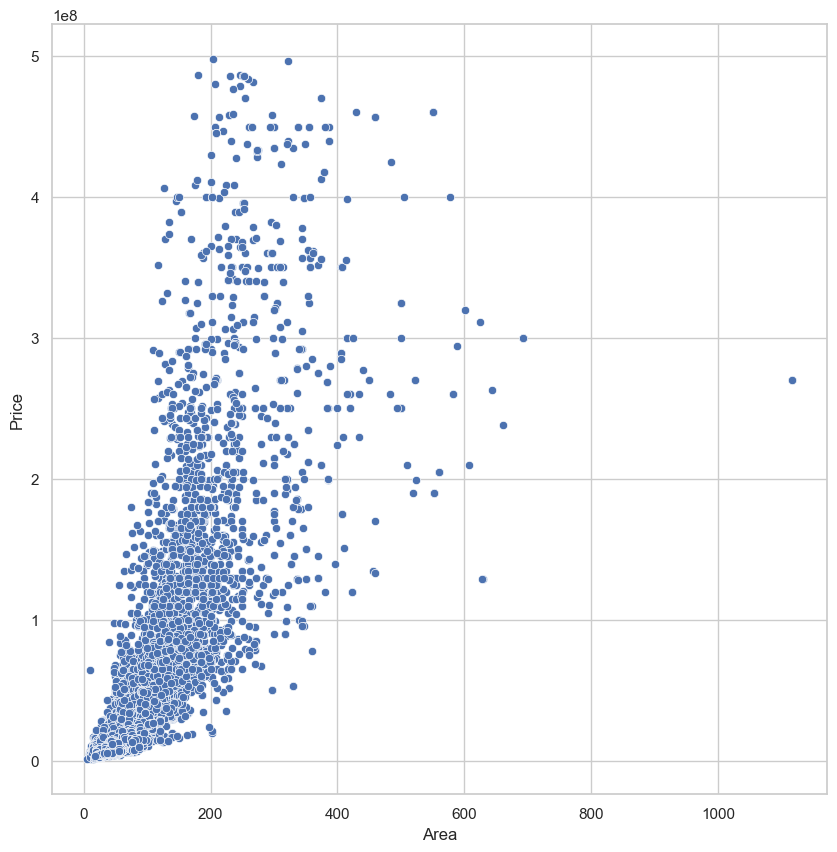

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
data_without_big_price = data[data['Price'] < 5 * 10 ** 8]
sns.scatterplot(ax=ax, x='Area', y='Price', data=data_without_big_price)

На графике рассеяния можно увидеть взаимосвязь между двумя переменными. Например, можно посмотреть, как цена квартиры зависит от ее площади.

Посмотрим насколько на эту зависимость влияет целевой признак количество комнат `Number of rooms`.

<Axes: xlabel='Area', ylabel='Price'>

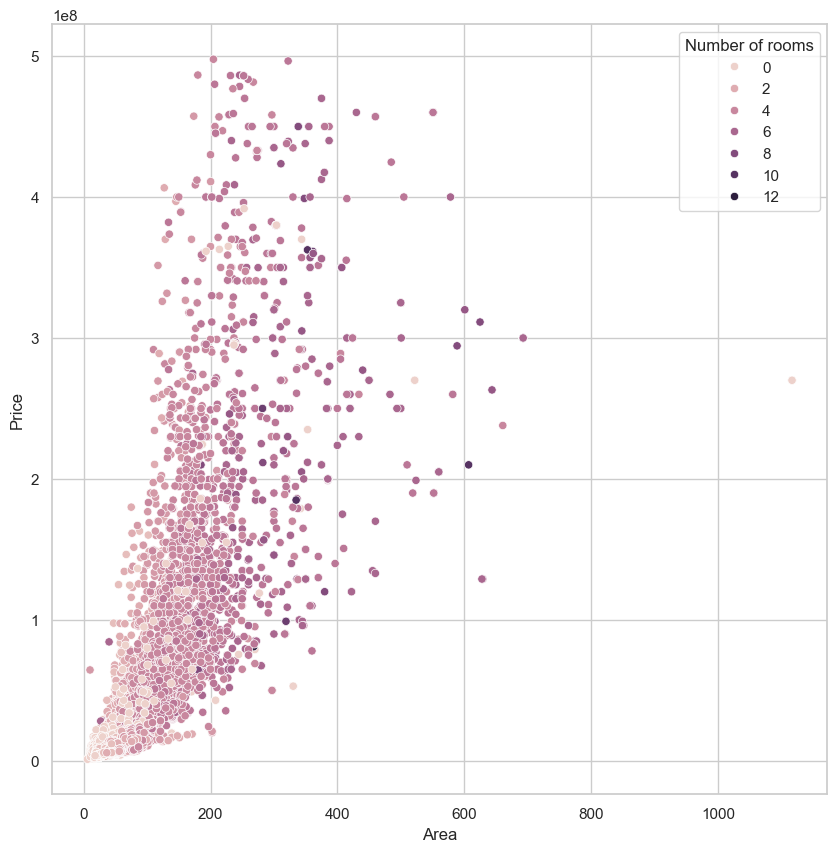

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
data_without_big_price = data[data['Price'] < 5 * 10 ** 8]
sns.scatterplot(ax=ax, x='Area', y='Price', data=data_without_big_price, hue='Number of rooms')

### Гистограмма

Гистограмма позволяет увидеть распределение переменной. Например, можно посмотреть, какое распределение цен на квартиры в Москве (стоимостью менее 50 млн).

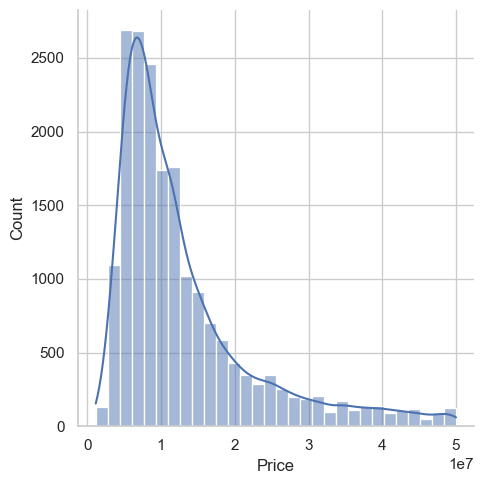

In [18]:
data_without_big_price = data[data['Price'] < 5 * 10 ** 7]
sns.displot(data_without_big_price['Price'], kde=True, bins=30)

Построим распределение времени пешей ходьбы в минутах до метро на гистограмме.

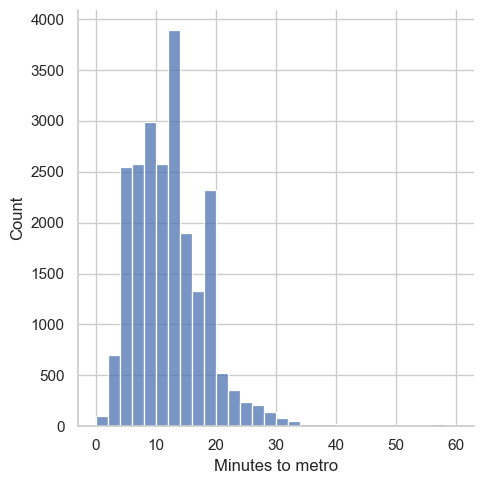

In [20]:
sns.displot(data['Minutes to metro'], bins=30)

# 4) Информация о корреляции признаков



In [32]:
df = pd.DataFrame(data)
df.corr(method='pearson', numeric_only=True)

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134
Minutes to metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209
Number of rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465
Living area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737
Kitchen area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803
Number of floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000


<Axes: >

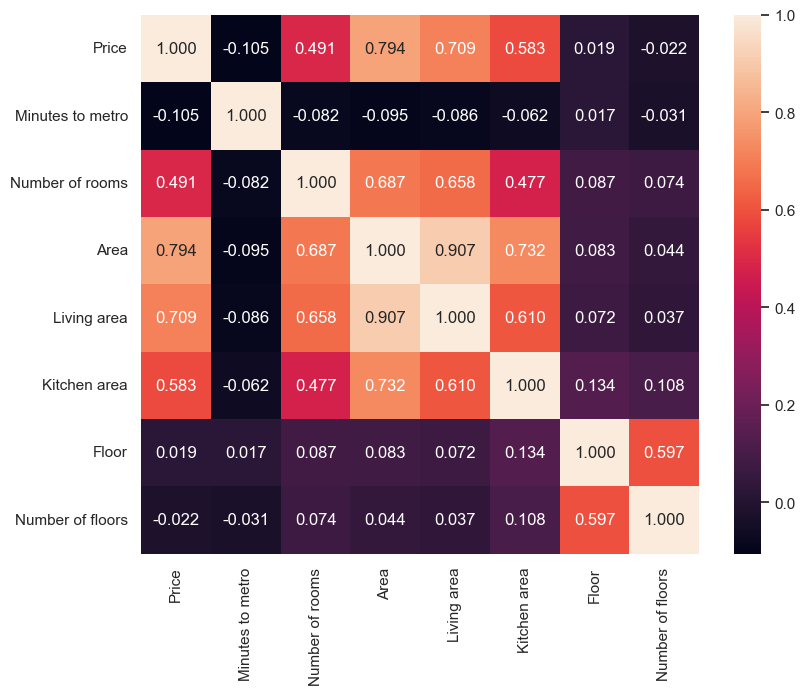

In [35]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.3f')

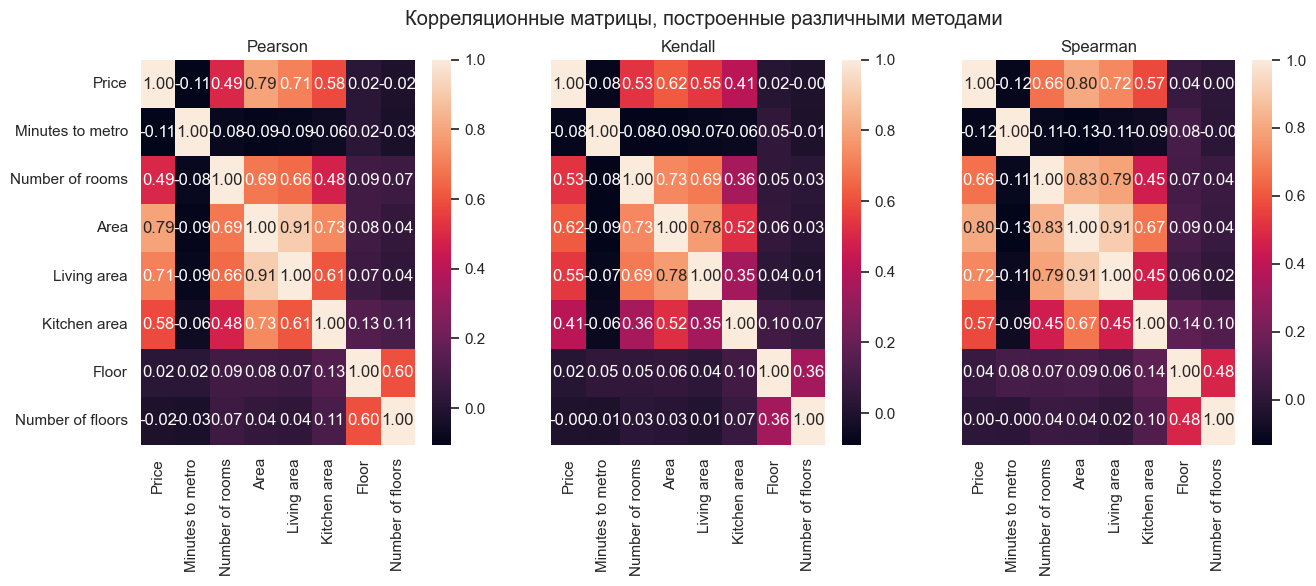

In [37]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True, method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(numeric_only=True, method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(numeric_only=True, method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')